In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../kdd2004.csv')
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [5]:
df.target.unique()

array([-1,  1])

In [7]:
df.target = df.target.map({-1:0, 1:1})
df.target.unique()

array([0, 1])

In [9]:
df.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [15]:
X = df.drop('target', axis=1)
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73'],
      dtype='object')

In [16]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

In [19]:

from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(X_train, y_train)

y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
import sklearn.metrics

In [24]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [25]:
from sklearn.metrics import roc_auc_score

In [27]:
from sklearn.metrics import roc_curve

In [29]:
y_test_base = pd.Series(np.zeros(len(y_test)))
y_test_base.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [30]:
roc_auc_score(y_test, y_test_base)

np.float64(0.5)

In [31]:
?roc_curve

Signature:
roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array-like of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).
    For :term:`decision_function` scores, values greater than or equal to
    zero should indicate the positive class.

pos_label : int, float, bool or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1,

In [37]:
test = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

In [39]:
dir(test)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [40]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : array-like of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
        For :term:`decision_function` scores, values greater than or equal to
        zero should indicate the positive class.
    
    pos_label : int, float, bool or str, defaul

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict(X_test), pos_label=1)

In [45]:
type(fpr)
len(fpr)

3

In [46]:
?roc_curve

Signature:
roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array-like of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).
    For :term:`decision_function` scores, values greater than or equal to
    zero should indicate the positive class.

pos_label : int, float, bool or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1,

In [47]:
fpr

array([0.0000000e+00, 2.3083493e-05, 1.0000000e+00])

In [48]:
thresholds

array([inf,  1.,  0.])

In [49]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [50]:
from sklearn.metrics import RocCurveDisplay

In [51]:
?RocCurveDisplay

Init signature:
RocCurveDisplay(
    *,
    fpr,
    tpr,
    roc_auc=None,
    estimator_name=None,
    pos_label=None,
)
Docstring:     
ROC Curve visualization.

It is recommend to use
:func:`~sklearn.metrics.RocCurveDisplay.from_estimator` or
:func:`~sklearn.metrics.RocCurveDisplay.from_predictions` to create
a :class:`~sklearn.metrics.RocCurveDisplay`. All parameters are
stored as attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
fpr : ndarray
    False positive rate.

tpr : ndarray
    True positive rate.

roc_auc : float, default=None
    Area under ROC curve. If None, the roc_auc score is not shown.

estimator_name : str, default=None
    Name of estimator. If None, the estimator name is not shown.

pos_label : int, float, bool or str, default=None
    The class considered as the positive class when computing the roc auc
    metrics. By default, `estimators.classes_[1]` is considered
    as the positive class.

    .. versionadded:: 0.24



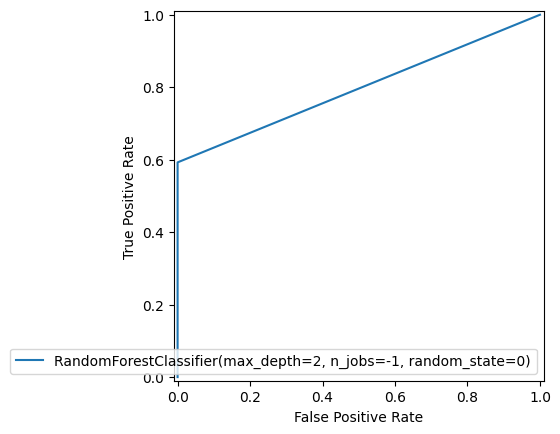

In [54]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=rf)
display.plot()

In [55]:
import yellowbrick.classifier

In [56]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [57]:
from yellowbrick.classifier import ROCAUC

In [58]:
?ROCAUC

Init signature:
ROCAUC(
    estimator,
    ax=None,
    micro=True,
    macro=True,
    per_class=True,
    binary=False,
    classes=None,
    encoder=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Receiver Operating Characteristic (ROC) curves are a measure of a
classifier's predictive quality that compares and visualizes the tradeoff
between the models' sensitivity and specificity. The ROC curve displays
the true positive rate on the Y axis and the false positive rate on the
X axis on both a global average and per-class basis. The ideal point is
therefore the top-left corner of the plot: false positives are zero and
true positives are one.

This leads to another metric, area under the curve (AUC), a computation
of the relationship between false positives and true positives. The higher
the AUC, the better the model generally is. However, it is also important
to inspect the "steepness" of the curve, as this describes the
maximization of the true pos

In [60]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'BackendFilter',
 'Button',
 'Circle',
 'Colorizer',
 'ColorizingArtist',
 'Colormap',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_ColorizerInterface',
 '_NO_PYPLOT_NOTE',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_a

In [61]:
?plt.rcParams

Type:        RcParams
String form:
_internal.classic_mode: False
           agg.path.chunksize: 0
           animation.bitrate: -1
           animation.codec: h264
           a <...> : True
           ytick.minor.size: 0.0
           ytick.minor.visible: False
           ytick.minor.width: 0.5
           ytick.right: False
Length:      322
File:        ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/matplotlib/__init__.py
Docstring:  
A dict-like key-value store for config parameters, including validation.

Validating functions are defined and associated with rc parameters in
:mod:`matplotlib.rcsetup`.

The list of rcParams is:

- _internal.classic_mode
- agg.path.chunksize
- animation.bitrate
- animation.codec
- animation.convert_args
- animation.convert_path
- animation.embed_limit
- animation.ffmpeg_args
- animation.ffmpeg_path
- animation.frame_format
- animation.html
- animation.writer
- axes.autolimit_mode
- axes.axisbelow
- axes.edgecolor
- axes

In [71]:
plt.rcParams['font.family'] = 'DejaVu Sans'

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


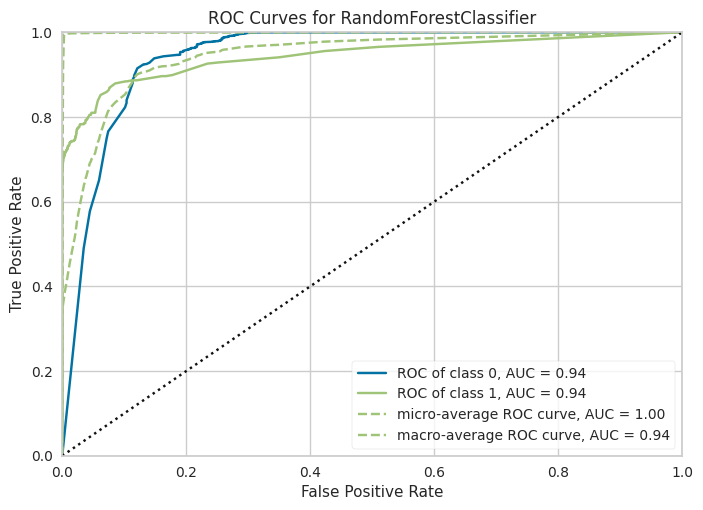

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [73]:
visualizer = ROCAUC(estimator=rf, classes=[0,1])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [75]:
dir(yellowbrick)

['ClassBalance',
 'ClassificationScoreVisualizer',
 'ROCAUC',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 '_orig_rc_params',
 'anscombe',
 'base',
 'bestfit',
 'classifier',
 'color_palette',
 'contrib',
 'datasaurus',
 'draw',
 'exceptions',
 'get_version',
 'mpl',
 'reset_defaults',
 'reset_orig',
 'set_aesthetic',
 'set_color_codes',
 'set_palette',
 'set_style',
 'style',
 'target',
 'utils',
 'version']

In [76]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [78]:
from yellowbrick.classifier import ROCAUC

In [79]:
?ROCAUC

Init signature:
ROCAUC(
    estimator,
    ax=None,
    micro=True,
    macro=True,
    per_class=True,
    binary=False,
    classes=None,
    encoder=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Receiver Operating Characteristic (ROC) curves are a measure of a
classifier's predictive quality that compares and visualizes the tradeoff
between the models' sensitivity and specificity. The ROC curve displays
the true positive rate on the Y axis and the false positive rate on the
X axis on both a global average and per-class basis. The ideal point is
therefore the top-left corner of the plot: false positives are zero and
true positives are one.

This leads to another metric, area under the curve (AUC), a computation
of the relationship between false positives and true positives. The higher
the AUC, the better the model generally is. However, it is also important
to inspect the "steepness" of the curve, as this describes the
maximization of the true pos

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


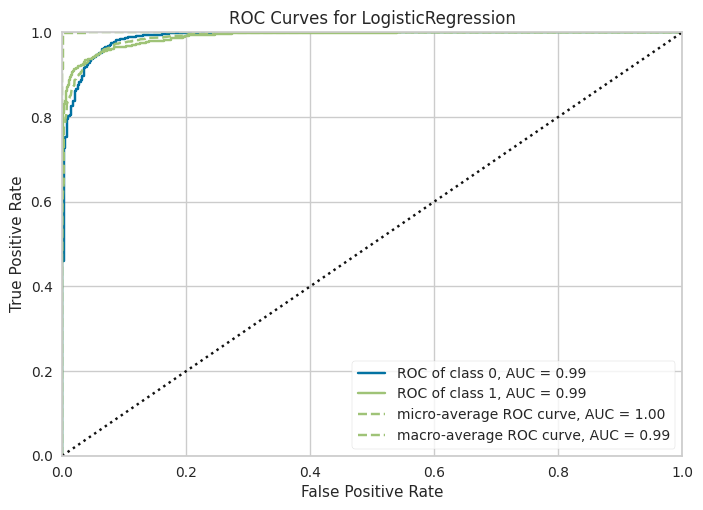

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [80]:
visualizer_lr = ROCAUC(lr, classes=[0,1])
visualizer_lr.fit(X_train, y_train)
visualizer_lr.score(X_test, y_test)
visualizer_lr.show()

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


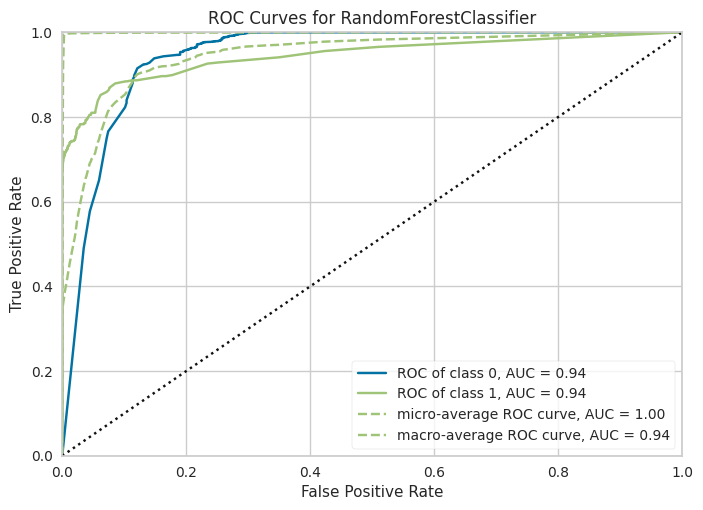

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [82]:
visualizer = ROCAUC(rf, classes=[0,1])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [83]:
from sklearn.metrics import roc_auc_score

In [84]:
?roc_auc_score

Signature:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)     from prediction scores.

Note: this implementation can be used with binary, multiclass and
multilabel classification, but some restrictions apply (see Parameters).

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases
    expect labels with shape (n_samples,) while the multilabel case expects
    binary label indicators with shape (n_samples, n_classes).

y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores.

    * In the binary case, it corresponds to an array of shape
      `(n_samples,)`. Both probability estimates and non-thresholded
     

In [85]:
roc_auc_score(y_test, y_test_base)

np.float64(0.5)

In [86]:
print(f"""
ROC-AUC score, baseline: {roc_auc_score(y_test, y_test_base)}
ROC-AUC score, rf: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}
ROC-AUC score, lr: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}

      """)


ROC-AUC score, baseline: 0.5
ROC-AUC score, rf: 0.9443759064189495
ROC-AUC score, lr: 0.9896752950483628

      


In [87]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [88]:
help(RocCurveDisplay)

Help on class RocCurveDisplay in module sklearn.metrics._plot.roc_curve:

class RocCurveDisplay(sklearn.utils._plotting._BinaryClassifierCurveDisplayMixin)
 |  RocCurveDisplay(*, fpr, tpr, roc_auc=None, estimator_name=None, pos_label=None)
 |  
 |  ROC Curve visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.RocCurveDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.RocCurveDisplay.from_predictions` to create
 |  a :class:`~sklearn.metrics.RocCurveDisplay`. All parameters are
 |  stored as attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  fpr : ndarray
 |      False positive rate.
 |  
 |  tpr : ndarray
 |      True positive rate.
 |  
 |  roc_auc : float, default=None
 |      Area under ROC curve. If None, the roc_auc score is not shown.
 |  
 |  estimator_name : str, default=None
 |      Name of estimator. If None, the estimator name is not shown.
 |  
 |  pos_label : int, float, bool or str, d

In [90]:
thresholds = np.linspace(0,1,100)

In [92]:
from sklearn.metrics import recall_score, confusion_matrix

In [93]:
?recall_score

Signature:
recall_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the recall.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
recall for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and recall for both classes are computed then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
recall for all `labels` are either returned or averaged dependin

In [95]:
fpr_ls = []
tpr_ls = []

thresholds = np.linspace(0,1,100)

for threshold in thresholds:

    condition = lr.predict_proba(X_test)[:,1] >= threshold
    y_test_predict_manual = np.where(condition, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict_manual).ravel()

    FPR = fp/(fp+tn)
    TPR = recall_score(y_test, y_test_predict_manual, pos_label=1)

    fpr_ls.append(FPR)
    tpr_ls.append(TPR)




In [97]:
len(fpr_ls)

100

In [98]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [99]:
help(RocCurveDisplay)

Help on class RocCurveDisplay in module sklearn.metrics._plot.roc_curve:

class RocCurveDisplay(sklearn.utils._plotting._BinaryClassifierCurveDisplayMixin)
 |  RocCurveDisplay(*, fpr, tpr, roc_auc=None, estimator_name=None, pos_label=None)
 |  
 |  ROC Curve visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.RocCurveDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.RocCurveDisplay.from_predictions` to create
 |  a :class:`~sklearn.metrics.RocCurveDisplay`. All parameters are
 |  stored as attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  fpr : ndarray
 |      False positive rate.
 |  
 |  tpr : ndarray
 |      True positive rate.
 |  
 |  roc_auc : float, default=None
 |      Area under ROC curve. If None, the roc_auc score is not shown.
 |  
 |  estimator_name : str, default=None
 |      Name of estimator. If None, the estimator name is not shown.
 |  
 |  pos_label : int, float, bool or str, d

In [101]:
FPR = pd.Series(fpr_ls)
FPR.head()

0    1.000000
1    0.039080
2    0.020129
3    0.013319
4    0.010041
dtype: float64

In [102]:
TPR = pd.Series(tpr_ls)
TPR.head()

0    1.000000
1    0.933333
2    0.913580
3    0.893827
4    0.876543
dtype: float64

In [103]:
from sklearn.metrics import auc

In [104]:
?auc

Signature: auc(x, y)
Docstring:
Compute Area Under the Curve (AUC) using the trapezoidal rule.

This is a general function, given points on a curve.  For computing the
area under the ROC-curve, see :func:`roc_auc_score`.  For an alternative
way to summarize a precision-recall curve, see
:func:`average_precision_score`.

Parameters
----------
x : array-like of shape (n,)
    X coordinates. These must be either monotonic increasing or monotonic
    decreasing.
y : array-like of shape (n,)
    Y coordinates.

Returns
-------
auc : float
    Area Under the Curve.

See Also
--------
roc_auc_score : Compute the area under the ROC curve.
average_precision_score : Compute average precision from prediction scores.
precision_recall_curve : Compute precision-recall pairs for different
    probability thresholds.

Examples
--------
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([1, 1, 2, 2])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_

In [105]:
auc(FPR, TPR)

np.float64(0.9637781807414703)

In [114]:
pf = pd.concat([FPR, TPR], axis = 1)
pf.columns = ['FPR', 'TPR']
pf.index = thresholds

In [115]:
pf.head()

,FPR,TPR
0.000000,1.000000,1.000000
0.010101,0.039080,0.933333
0.020202,0.020129,0.913580
0.030303,0.013319,0.893827
0.040404,0.010041,0.876543


<Axes: >

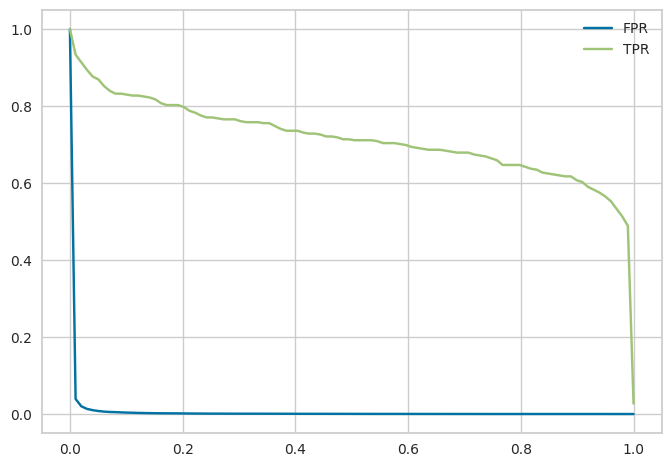

In [ ]:
pf.plot()

In [113]:
help(RocCurveDisplay)

Help on class RocCurveDisplay in module sklearn.metrics._plot.roc_curve:

class RocCurveDisplay(sklearn.utils._plotting._BinaryClassifierCurveDisplayMixin)
 |  RocCurveDisplay(*, fpr, tpr, roc_auc=None, estimator_name=None, pos_label=None)
 |  
 |  ROC Curve visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.RocCurveDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.RocCurveDisplay.from_predictions` to create
 |  a :class:`~sklearn.metrics.RocCurveDisplay`. All parameters are
 |  stored as attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  fpr : ndarray
 |      False positive rate.
 |  
 |  tpr : ndarray
 |      True positive rate.
 |  
 |  roc_auc : float, default=None
 |      Area under ROC curve. If None, the roc_auc score is not shown.
 |  
 |  estimator_name : str, default=None
 |      Name of estimator. If None, the estimator name is not shown.
 |  
 |  pos_label : int, float, bool or str, d

In [117]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [118]:
auc(pf.FPR, pf.TPR)

np.float64(0.9637781807414703)

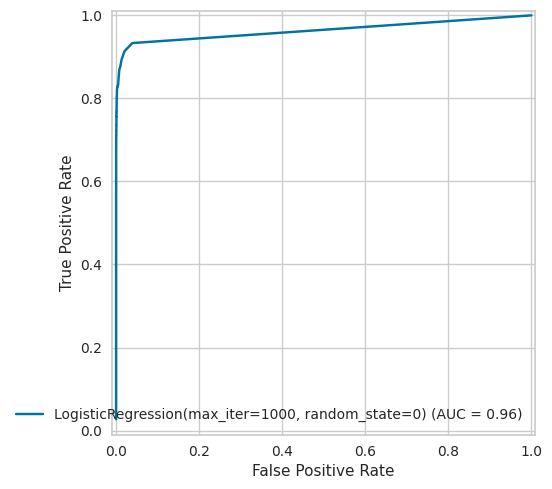

In [120]:
display = RocCurveDisplay(fpr=pf.FPR, tpr=pf.TPR, roc_auc = auc(pf.FPR, pf.TPR), estimator_name = lr)

display.plot()

In [121]:
?ROCAUC

Init signature:
ROCAUC(
    estimator,
    ax=None,
    micro=True,
    macro=True,
    per_class=True,
    binary=False,
    classes=None,
    encoder=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Receiver Operating Characteristic (ROC) curves are a measure of a
classifier's predictive quality that compares and visualizes the tradeoff
between the models' sensitivity and specificity. The ROC curve displays
the true positive rate on the Y axis and the false positive rate on the
X axis on both a global average and per-class basis. The ideal point is
therefore the top-left corner of the plot: false positives are zero and
true positives are one.

This leads to another metric, area under the curve (AUC), a computation
of the relationship between false positives and true positives. The higher
the AUC, the better the model generally is. However, it is also important
to inspect the "steepness" of the curve, as this describes the
maximization of the true pos

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


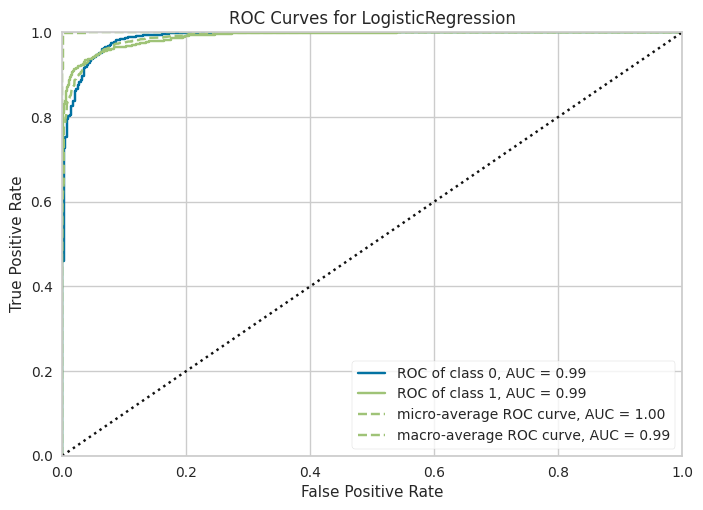

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [122]:
visualizer = ROCAUC(lr, classes=[0,1])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [125]:
y_test_lr = lr.predict_proba(X_test)[:,1]

In [127]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_test_lr)

In [130]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0 ,1,0,1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

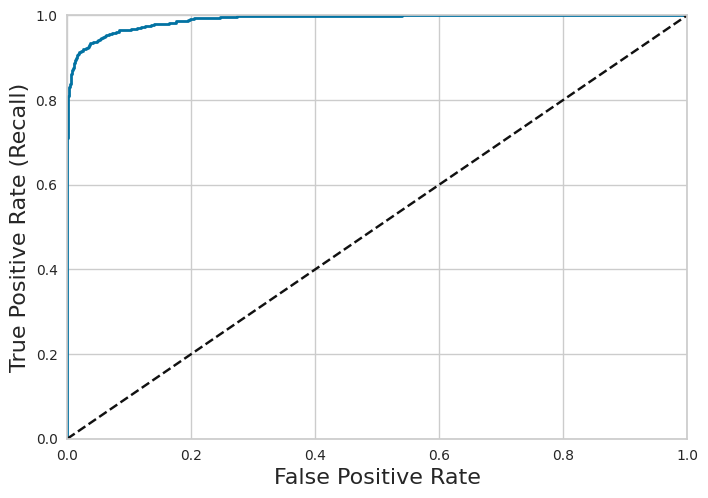

In [131]:
plot_roc_curve(fpr_lr, tpr_lr, "Logistic Reg")